# Homework: Competitive Grammar Writing

In [585]:
from pcfg_parse_gen import Pcfg, PcfgGenerator, CkyParse
import nltk

def print_tree(tree_string):
    tree_string = tree_string.strip()
    tree = nltk.Tree.fromstring(tree_string)
    tree.pretty_print()

def draw_tree(tree_string):
    tree_string = tree_string.strip()
    tree = nltk.Tree.fromstring(tree_string)
    tree.draw()

## Parsing sentences with your grammar

While you are developing your grammar you should parse with your grammar both example sentences and samples from your and other grammars.

In [586]:
parse_gram = Pcfg(["S1.gr","S2.gr","Vocab.gr"])

#reading grammar file: S1.gr
#reading grammar file: S2.gr
#reading grammar file: Vocab.gr


In [587]:
parser = CkyParse(parse_gram, beamsize=0.00001)
ce, trees = parser.parse_sentences(["Arthur is the king ."])
print("-cross entropy: {}".format(ce))
for tree_string in trees:
    print_tree(tree_string)

(TOP (S1 (NP (Proper Arthur) ) (_VP (VP (VerbT is) (NP (Det the) (Nbar (Noun king) ))) (Punc .))) )
-cross entropy: -3.7863679540999504
             TOP              
              |                
              S1              
   ___________|___             
  |              _VP          
  |            ___|________    
  |           VP           |  
  |       ____|___         |   
  |      |        NP       |  
  |      |     ___|___     |   
  NP     |    |      Nbar  |  
  |      |    |       |    |   
Proper VerbT Det     Noun Punc
  |      |    |       |    |   
Arthur   is  the     king  .  



#parsing: ['Arthur', 'is', 'the', 'king', '.']
#-cross entropy (bits/word): -3.78637


In [588]:
ce, trees = parser.parse_sentences(["five strangers are at the Round Table ."])
print("-cross entropy: {}".format(ce))
for tree_string in trees:
    print_tree(tree_string)

(TOP (S2 (_Misc (Misc five) (_Misc (Misc strangers) (_Misc (Misc are) (_Prep (Prep at) (_Det (Det the) (_Misc (Misc (_Round Round) (_Table Table)) (_Misc (Misc .) ))))))) ) )
-cross entropy: -9.807330330570931
        TOP                                             
         |                                               
         S2                                             
         |                                               
       _Misc                                            
  _______|_______                                        
 |             _Misc                                    
 |        _______|__________                             
 |       |                _Misc                         
 |       |        __________|_____                       
 |       |       |              _Prep                   
 |       |       |     ___________|_____                 
 |       |       |    |                _Det             
 |       |       |    |      ___________|__

#parsing: ['five', 'strangers', 'are', 'at', 'the', 'Round', 'Table', '.']
#-cross entropy (bits/word): -9.80733


Use `parse_file` to parse a file of sentences.

In [589]:
ce, trees = parser.parse_file('example_sentences.txt')
print("-cross entropy: {}".format(ce))

(TOP (S1 (NP (Proper Arthur) ) (_VP (VP (VerbT is) (NP (Det the) (Nbar (Noun king) ))) (Punc .))) )
(TOP (S1 (NP (Proper Arthur) ) (_VP (VP (VerbT rides) (NP (Det the) (Nbar (Nbar (Noun horse) ) (PP (Prep near) (NP (Det the) (Nbar (Noun castle) )))))) (Punc .))) )
(TOP (S2 (_Misc (Misc riding) (_Misc (Misc to) (_Misc (Misc Camelot) (_VerbT (VerbT is) (_Misc (Misc hard) (_Misc (Misc .) )))))) ) )
(TOP (S2 (_Misc (Misc do) (_Misc (Misc coconuts) (_Misc (Misc speak) (_Misc (Misc ?) )))) ) )
(TOP (S2 (_Misc (Misc what) (_Misc (Misc does) (_Proper (Proper Arthur) (_Misc (Misc ride) (_Misc (Misc ?) ))))) ) )
(TOP (S2 (_Misc (Misc who) (_Misc (Misc does) (_Proper (Proper Arthur) (_Misc (Misc suggest) (_Misc (Misc she) (_Misc (Misc carry) (_Misc (Misc ?) ))))))) ) )
(TOP (S2 (_Misc (Misc why) (_Misc (Misc does) (_Misc (Misc England) (_Misc (Misc have) (_Det (Det a) (_Noun (Noun king) (_Misc (Misc ?) ))))))) ) )
(TOP (S2 (_Misc (Misc are) (_Misc (Misc they) (_Misc (Misc suggesting) (_Proper (Pr

#parsing: ['Arthur', 'is', 'the', 'king', '.']
#parsing: ['Arthur', 'rides', 'the', 'horse', 'near', 'the', 'castle', '.']
#parsing: ['riding', 'to', 'Camelot', 'is', 'hard', '.']
#parsing: ['do', 'coconuts', 'speak', '?']
#parsing: ['what', 'does', 'Arthur', 'ride', '?']
#parsing: ['who', 'does', 'Arthur', 'suggest', 'she', 'carry', '?']
#parsing: ['why', 'does', 'England', 'have', 'a', 'king', '?']
#parsing: ['are', 'they', 'suggesting', 'Arthur', 'ride', 'to', 'Camelot', '?']
#parsing: ['five', 'strangers', 'are', 'at', 'the', 'Round', 'Table', '.']
#parsing: ['Guinevere', 'might', 'have', 'known', '.']
#parsing: ['Guinevere', 'should', 'be', 'riding', 'with', 'Patsy', '.']
#parsing: ['it', 'is', 'Sir', 'Lancelot', 'who', 'knows', 'Zoot', '!']
#parsing: ['either', 'Arthur', 'knows', 'or', 'Patsy', 'does', '.']
#parsing: ['neither', 'Sir', 'Lancelot', 'nor', 'Guinevere', 'will', 'speak', 'of', 'it', '.']
#parsing: ['the', 'Holy', 'Grail', 'was', 'covered', 'by', 'a', 'yellow', 'fruit

## Generating sentences with your grammar

While you are developing your grammar you should generate sentences with your grammar
to check what your grammar is doing. Try to write your grammars to that it will 
generate hard to parse sentences.

In [590]:
gen_gram = Pcfg(["S1.gr","Vocab.gr"])

#reading grammar file: S1.gr
#reading grammar file: Vocab.gr


In [591]:
gen = PcfgGenerator(gen_gram)
for _ in range(20):
    print(" ".join(gen.generate()))

that king rides no defeater .
another quest is each fruit .
each sovereign drinks this king
the horse across Zoot is no master
drinking
another fruit carries no servant .
any sun is the horse
each coconut carries every corner .
a king through no castle rides any chalice
every master rides no horse
another fruit through a coconut is no home
another king across that servant has this castle
Sir Lancelot is each home
the winter is this fruit .
every sun over the pound has every sovereign
that coconut carries no coconut
a story by a sun is this home
the servant has the servant
a horse rides the husk
that winter is each winter .


## Getting the single word distributions from example_sentence and devset.txt

In [592]:

from nltk.probability import FreqDist
import numpy as np 
import pandas as pd 




example_sents_file = open('example_sentences.txt','r')
devset_file = open('devset.txt','r')

corpus = example_sents_file.readlines() + devset_file.readlines()
tokenized_corpus = [nltk.word_tokenize(sent) for sent in corpus ]
FLAT_TOKEN_LIST=[]
for a in tokenized_corpus : 
    for b in a : 
        FLAT_TOKEN_LIST.append(b)
        
vocab_dist = FreqDist(FLAT_TOKEN_LIST)
vocab_dist_df = pd.DataFrame(data=list(vocab_dist.values()),columns=['freq'])
vocab_dist_df['token'] = list(vocab_dist.keys())
vocab_dist_df['pos'] = vocab_dist_df.apply(lambda x: nltk.pos_tag([x['token']])[0][1],axis=1)

total_count = vocab_dist_df['freq'].sum()
vocab_dist_df['prob'] = vocab_dist_df.apply(lambda x: int(x['freq'])/total_count,axis=1 )
vocab_dist_df.head()
VOCAB_DICT = vocab_dist_df[['token','freq']].values.tolist()
VOCAB_DICT=dict(VOCAB_DICT)


## UPDATE THE PROBS AS WEIGHTS INTO VOCAB FILE WITH GIVEN TOKEN.

## Write the Calculated single token weights to NewVocab.gr

In [709]:
## CREATING NewVocab.gr

## have pos for already existing tokens
## add new tokens from allowed_words and get pos for them also.

import re 
vocab_file = open("Vocab.gr")
VOCAB_RULES=[]
new_vocab_file=open("NewVocab.gr",'w')
NEW_POS=[]

NEW_POS_LINE=[]

ALL_POS=[]

DELIMITERS=[" "*i for i in range(10)]

for line in vocab_file : 
    if line[0] != "#" and re.match(r'[0-9|\.]',line[0]) and line[0] != " " : ## A VALID GRAMMAR 
            
            REGEX=r"([0-9]*)\ +([A-Za-z_]*)\ +([A-Za-z_0-9\?\.\,\'\;'\!\"\--\-\:]*)"
            contents = re.findall(REGEX,line)[0]
            
            weight = contents[0]
            original_pos = contents[1]
            token = contents[2]
                 
            new_line="" 
            new_pos = nltk.pos_tag([token])[0][1] 
            if new_pos=='.' : 
                new_pos="DOT"
            elif new_pos==',' : 
                new_pos='COMMA'
            elif new_pos==':' : 
                new_pos='SEMI-COLON'
            
                
    
            if str(token) in VOCAB_DICT.keys() : 
                new_line = "{} {} {}\n".format(1+int(VOCAB_DICT[token]),new_pos,token)
            else : 
                new_line = "{} {} {}\n".format(1,new_pos,token)
                    
                    
            NEW_POS.append(new_pos)
            ALL_POS.append(new_pos)

            new_vocab_file.write(new_line)
            NEW_POS_LINE.append(new_line)


    else : 
        #print(line)
        new_vocab_file.write(line)
        NEW_POS_LINE.append(line)


new_vocab_file.write("# NEW VOCABULARY FROM allowed_words.txt\n")

allowed_word_file = open("allowed_words.txt","r")       

for token in allowed_word_file : 
    
    token = token.strip()
    pos_token = nltk.pos_tag([token])[0][1]
    token_weight = 1
    #print("{}".format(pos_token))
    new_vocab_file.write("{} {} {}\n".format(token_weight,pos_token,token))
    
        

new_vocab_file.close()

## make the set of all part of speeches 
POS_set=set(ALL_POS)

## UNIQUE POS FROM allowed_words.txt

In [710]:
POS_set

{'CC',
 'CD',
 'COMMA',
 'DOT',
 'DT',
 'IN',
 'JJ',
 'JJS',
 'MD',
 'NN',
 'NNP',
 'NNS',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'SEMI-COLON',
 'TO',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WP$',
 'WRB'}

## Creating new rules for s2 in s2_new.gr. These new rules have vocabulary which we used to replace Misc.

In [711]:
## CREATING S2_new.gr


## SCRIPT FOR NEW RULES IN S2.gr
## THE IDEA IS TO GENERATE a -> b c 
## THE WEIGHTS ARE KEPT ONE FOR SYMPLICITY NOW.

A_RULES = ["_{}".format(non_terminal) for non_terminal in POS_set ]
A_RULES_SPACE = []
A_RULES_SPACE.append("")

for i in range(len(A_RULES)) : 
    A_RULES_SPACE.append(A_RULES[i])

S2_STRAIGHT_RULES=[]
S2_ALL_RULES=[]
s2_new_file=open("S2_new.gr","w")


for a in A_RULES : 
    s2_new_file.write("1 S2 {}\n".format(a))
    
## CREATE S2_new.gr with 1 a b c rules
for a in A_RULES : 
    for b in POS_set : 
        for c in A_RULES_SPACE : 

            
            if c == "" : 
                S2_ALL_RULES.append("1 {} {}\n".format(a,b))
                S2_STRAIGHT_RULES.append("{} -> {} {}".format(a,b,c))
                s2_new_file.write("1 {} {}\n".format(a,b))
            else : 
                S2_ALL_RULES.append("1 {} {} {}\n".format(a,b,c))
                S2_STRAIGHT_RULES.append("{} -> {} {}".format(a,b,c))
                s2_new_file.write("1 {} {} {}\n".format(a,b,c))

s2_new_file.close()
#print(S2_ALL_RULES)

## Calculating the Rules distribution (A -> B C) from Penn Treebank

In [712]:
## FREQUENCY DISTRIBUTION FROM TREE-BANK


from nltk import Nonterminal, nonterminals, Production, CFG, Tree
import numpy as np
import pandas as pd 
from nltk import bigrams, trigrams 
from collections import defaultdict
penn_rules_freq = defaultdict(int)
from nltk.corpus import treebank


def find_freq(row) : 
    lhs = row['lhs']
    rhs = row['rhs']
    penn_rules_freq[lhs,rhs]+=1
    


def set_freq(row,freq_set) : 
    dict_set = dict(freq_set)
    lhs = row['lhs'] ## type is non-terminal
    rhs = row['rhs']
    
    for elems in dict_set : 
        lhs_1 = elems[0]
        rhs_1 = elems[1]
        
        if lhs_1 == lhs and rhs_1==rhs : 
            #print(penn_rules_freq)
            return penn_rules_freq[elems]
        
        
## TESTING ONLY AT FIRST 100 PARSED SENTS

PARSED_SENTS=[]
LHS=[]
RHS=[]

NUMBER_OF_TREE_SAMPLES=100000
for tree in treebank.parsed_sents()[:NUMBER_OF_TREE_SAMPLES] : 
    
    single_sent_prods = tree.productions()
    for single_prod in single_sent_prods : 
       # print(single_prod)
        
        rhs_tuple = single_prod.rhs()
        lhs_tuple = single_prod.lhs()
        ## TAKE ONLY RULES WITH TWO NON-TERMS ON RHS, AND IGNORE THE REST (NOT IN CNF FORM)
        if len(rhs_tuple) == 2 : 
            LHS.append(lhs_tuple)
            RHS.append(rhs_tuple)
            
            
sents_df=pd.DataFrame()

sents_df['lhs']=LHS
sents_df['rhs']=RHS

sents_df.apply(find_freq,axis=1)


sents_df['combined']= sents_df.apply(lambda x:"{} -> {}".format(x['lhs'],x['rhs']),axis=1)


sents_df.head()



,lhs,rhs,combined
0,NP,"(NNP, NNP)","NP -> (NNP, NNP)"
1,ADJP,"(NP, JJ)","ADJP -> (NP, JJ)"
2,NP,"(CD, NNS)","NP -> (CD, NNS)"
3,VP,"(MD, VP)","VP -> (MD, VP)"
4,NP,"(DT, NN)","NP -> (DT, NN)"


## Calculating the Rules distribution (A -> B C) from Devset Tree dataset

In [674]:
## GET THE DEVSET RULES FILE

LHS_RULES=[]
RHS_RULES=[]
devset_file = open('DevSetRules_INCNF.txt','r')
for line in devset_file : 
    
    REGEX=r"([0-9]*)\ +([A-Za-z_0-9\?\.\,\'\;'\!\"\--\-\:\|\<\>]*)\ +([A-Za-z_0-9\?\.\,\'\;'\!\"\--\-\:\|\<\>]*)\ +([A-Za-z_0-9\?\.\,\'\;'\!\"\--\-\:\|\<\>]*)"
    contents = re.findall(REGEX,line)[0]
    #print(contents)
    weight = contents[0]
    lhs = contents[1]
    rhs1 = contents[2]
    rhs2 = contents[3]
    
    LHS_RULES.append(lhs)
    RHS_RULES.append("({},{})".format(rhs1,rhs2))
    

devset_df = pd.DataFrame(data=LHS_RULES,columns=['lhs'])    
devset_df['rhs']=RHS_RULES


devset_df['combined']= devset_df.apply(lambda x:"{} -> {}".format(x['lhs'],x['rhs']),axis=1)
print('NUMBER OF RULES WITH PROB > {} = {}'.format(PROBABILITY_THRESHOLD,merged_df2[merged_df2['prob']>0.5].sort_values(['prob'],ascending=False).size))



NUMBER OF RULES WITH PROB > 0.5 = 3240


## Combining Penn treebank and devset tree bank rules and calculate frequency

In [713]:
## DEVSET RULES + EXAMPLE_SENTS RULES

super_merged_df = sents_df.append(devset_df)
new_df1=super_merged_df['combined'].value_counts().to_frame().reset_index()
new_df1.columns=['combined','freq']
super_merged_df=super_merged_df.merge(new_df1,on=['combined'])
super_merged_df=super_merged_df.drop_duplicates()
allrules_freq_total=super_merged_df.groupby('lhs').apply(lambda x:sum(x['freq'])).to_frame().reset_index()
allrules_freq_total.columns=['lhs','total_count']
super_merged_df = super_merged_df.merge(allrules_freq_total,on=['lhs'])
super_merged_df['prob'] = super_merged_df.apply(lambda x:x['freq']/x['total_count'],axis=1)


In [714]:
groucho_grammar = nltk.CFG.fromstring("""
... S -> NP VP
... PP -> P NP
... NP -> Det N | Det N PP | 'I'
... VP -> V NP | VP PP
... Det -> 'an' | 'my'
... N -> 'elephant' | 'pajamas'
... V -> 'shot'
... P -> 'in'
... """)


In [621]:
vocab_dist_df.head()

,freq,token,pos,prob
0,30,Arthur,NNP,0.007168
1,41,is,VBZ,0.009797
2,107,the,DT,0.025568
3,15,king,NN,0.003584
4,228,.,.,0.054480


In [667]:
 from nltk.parse.generate import generate, demo_grammar
demo_grammar

"\n  S -> NP VP\n  NP -> Det N\n  PP -> P NP\n  VP -> 'slept' | 'saw' NP | 'walked' PP\n  Det -> 'the' | 'a'\n  N -> 'man' | 'park' | 'dog'\n  P -> 'in' | 'with'\n"

## USING VOCAB AND S2 RULES TO PARSE DEVSET [NOT WORKING THOUGH]

In [774]:
vocab_rules=vocab_dist_df.apply(lambda x:"{} -> {}\n".format(x['pos'],x['token']),axis=1).tolist()

all_straight_rules = vocab_rules + S2_STRAIGHT_RULES
#print(all_straight_rules)
all_straight_rules=[i for i in all_straight_rules if '.' not in i]
all_straight_rules=[i for i in all_straight_rules if ',' not in i]
all_straight_rules=[i for i in all_straight_rules if ':' not in i]
all_straight_rules=[i for i in all_straight_rules if '\'' not in i]
all_straight_rules=[i for i in all_straight_rules if '\``' not in i]

del all_straight_rules[322]
nltk.grammar._STANDARD_NONTERM_RE = re.compile('( [\w/][\w$/^<>\,\-\`\``]* ) \s*', re.VERBOSE)
#print(all_straight_rules)

#my_grammar = nltk.CFG.fromstring(all_straight_rules)


rd_parser = nltk.RecursiveDescentParser(my_grammar)
sent_file = open("example_sentences.txt","r")
 

#for line in sent_file: 
 #   print(line)
#    rd_parser.parse(line.split(" "))




## Extracting rules with Prob > 0.5 and with highest frequency afterwards.

Text(0.5,1,'WE WANT TO USE THE OUTLIERS BECAUSE THEY HAVE HIGHER FREQUENCIES. THERE ARE FEW RULES (~5) WHICH HAVE MORE THAN 1000 FREQUENCY AND THAT MEANS THEY ARE LIKELY TO OCCUR')

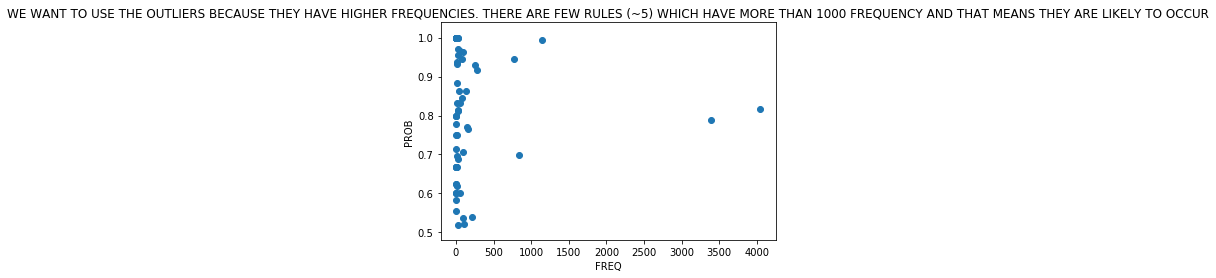

In [775]:
## TAKING MOST IMPORTANT RULES

import matplotlib.pyplot as plt 
%matplotlib inline

PROBABILITY_THRESH=0.5
top_rules_df = super_merged_df[super_merged_df['prob']>PROBABILITY_THRESH]
top_rules_df = top_rules_df.sort_values(['freq'],ascending=False)

FREQ=top_rules_df['freq'].tolist() ## x 
PROB=top_rules_df['prob'].tolist() ## y

plt.scatter(FREQ,PROB)
plt.xlabel('FREQ')
plt.ylabel('PROB')

plt.title('WE WANT TO USE THE OUTLIERS BECAUSE THEY HAVE HIGHER FREQUENCIES. THERE ARE FEW RULES (~5) WHICH HAVE MORE THAN 1000 FREQUENCY AND THAT MEANS THEY ARE LIKELY TO OCCUR')


## Writing the Extracted top priority rules to s1_new.gr

In [776]:

## WRITE TO S1_NEW.GR

top_rules_df= top_rules_df[:100]
print(top_rules_df)
s1_file = open("S1_new.gr","w")

s1_file.write("25  TOP  S1\n")
s1_file.write("75  TOP  S2\n")

def write_to_s1(row): 
    weight = row['freq']
    lhs = row['lhs']
    rhs1= row['rhs'][0]
    rhs2= row['rhs'][1]
    
    s1_file.write("{} {} {} {}\n".format(weight,lhs,rhs1,rhs2))
    
top_rules_df.apply(write_to_s1,axis=1)

s1_file.close()            



                                              lhs  \
608                                            PP   
643                                             S   
797                                        PP-LOC   
462                                        PP-CLR   
1147                                       PP-TMP   
1136                                        S-NOM   
1158                                     SBAR-ADV   
1192                                       PP-DIR   
1392                                        S-ADV   
1340                                       NP-ADV   
782                                       S-TPC-1   
1253                                           QP   
1126                                     SBAR-TMP   
1444                                        S-PRP   
1381                                       PP-MNR   
793                                         S-CLR   
1355                                     SBAR-PRP   
1231                                       PP-